# TANZANIA WATER WELL PROJECT

## INTRODUCTION

### Tanzania is a developing country based in East Africa Region that still has struggles with providing clean water to its entire population. There are many water points already established in the country, but some are in great need of repair while others have failed altogether.

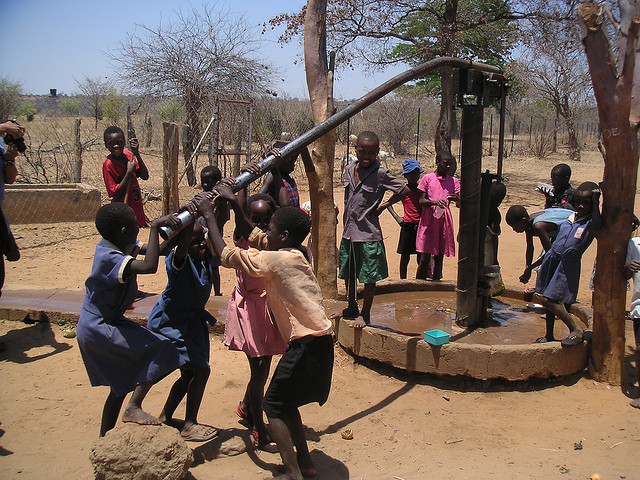

## BUSINESS UNDERSTANDING

### As an employee of the NGO i have been task to build machine learning models thats predict the functionality of all ground water pumps found throughout the country of Tanzania.If models are accurate, this could help save the Tanzanian government a lot of time and money.Accurate models can help to cut the cost on needing workers drive out to every water pump to inspect them.The government can use this study to know exactly which pumps are working, need repair and which ones aren’t working at all.

## DATA SOURCE
### This project was for a competition on datadriven.org. The website describes itself as:

###  "DrivenData works on projects at the intersection of data science and social impact, in areas like international development, health, education, research and conservation, and public services."

 ### The Taarifa Platform is an open source API designed to use citizen feedback on local problems. The competition and the data can be found at the link below:
 ### https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

### IMPORT NECESSARY MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



#### DATA IMPORT

In [2]:
test_set=pd.read_csv('test-set-values.csv')
train_labels=pd.read_csv('training-set-labels.csv')
train_values = pd.read_csv('training-set-values.csv')

In [3]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# Merge train values and test values
data = pd.concat([train_values, train_labels], ignore_index = True)
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
1,8776,0.0,3/6/2013,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN
2,34310,25.0,2/25/2013,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,NaN
3,67743,0.0,1/28/2013,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN
4,19728,0.0,7/13/2011,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118795,60739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
118796,27263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
118797,37057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
118798,31282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional


In [8]:
#combine training and the labels for it
combined = train_values.merge(train_labels, on='id')

###  1.1 DEALING WITH MISSING DATA IN COMBBINED DATA

In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
#finding the sum of null values in each column
combined.isna().sum()
# calculating column wise Null percentage
combined.isna().sum()/len(combined)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [12]:
# grouuping columns withh miissing values
combined[['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']]

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [13]:
combined[combined['funder'].isna()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
34,41583,0.0,2/23/2011,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
43,19282,0.0,1/15/2013,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
47,13620,0.0,7/27/2011,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
65,51072,0.0,2/9/2013,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
71,17386,0.0,3/31/2011,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,46563,0.0,2/19/2013,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
59366,55232,0.0,2/2/2013,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59370,14796,200.0,1/29/2013,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,...,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other,functional
59376,34716,0.0,2/3/2013,NaN,1581,NaN,34.821039,-5.076258,Nasingo,0,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional


From the analysis a I realize that  the funder of thhe pump are thhe same  to thhose  people who installed the pump.FIlling the missing value for both funder and installer I will replace bothh columns .Those remaining with  missing  value I will replace with the not_provided.

In [14]:
#filling null values in funder with data from installer
combined['funder'].fillna(combined['installer'], inplace=True)

In [15]:
#filling null values in installer with data from funder
combined['installer'].fillna(combined['funder'], inplace=True)

In [16]:
# looking for missing values from the installer and funder
combined[['funder','installer']].isna().sum()

funder       3582
installer    3582
dtype: int64

In [17]:
#filling the NaN values in the funder column with Not_provided
combined['funder'].fillna("not_provided",inplace =True)

In [19]:
#filling the NaN values in the funder column with Not_provided
combined['installer'].fillna("Not_provided",inplace =True)

In [20]:
#check for null values
combined.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [21]:
combined=combined.drop (["scheme_name"], axis =1)

In [22]:
#drop null rows in subvillage
combined.dropna(subset=['subvillage'], inplace = True)

In [23]:
#filling the NaN values in the permit and public meeting column with false.
combined['permit'].fillna(False,inplace =True)
combined['public_meeting'].fillna(False,inplace =True)

In [24]:
# check value counts in 'scheme_management'
combined['scheme_management'].value_counts()

VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [25]:
#filling the NaN values in the 'scheme_management'column with false.
combined['scheme_management'].fillna("None",inplace =True)

In [27]:
#check for null values in the data frame.
combined.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [28]:
combined.to_csv('cleaned_data.csv1')